In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("NHANES.csv")

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [3]:
# frequency table
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married", 6: 'Living with partner', 77: "Refused", 99: "Don't Know", '.':'Missing'})
da.DMDMARTL.value_counts()
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
da.DMDMARTLx.value_counts()

Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64

In [4]:
da[da['RIAGENDRx'] == 'Female']['DMDMARTLx'].value_counts()

Married                1303
Never married           520
Divorced                350
Widowed                 296
Living with partner     262
Separated               118
Refused                   1
Name: DMDMARTLx, dtype: int64

In [6]:
da[da['RIAGENDRx'] == 'Male']['DMDMARTLx'].value_counts()

Married                1477
Never married           484
Living with partner     265
Divorced                229
Widowed                 100
Separated                68
Refused                   1
Name: DMDMARTLx, dtype: int64

In [5]:
# insert your code here

da['age'] =  (da['RIDAGEYR'] >= 30) & ( da['RIDAGEYR'] <= 40)

da[da['age']]['DMDMARTLx'].value_counts()


Married                560
Never married          217
Living with partner    143
Divorced                70
Separated               30
Widowed                  5
Refused                  1
Name: DMDMARTLx, dtype: int64

In [144]:
da[da['RIAGENDRx'] == 'Female']['DMDMARTLx'].value_counts()

Married                1303
Never married           520
Divorced                350
Widowed                 296
Living with partner     262
Separated               118
Refused                   1
Name: DMDMARTLx, dtype: int64

In [145]:
y = da[da['RIAGENDRx'] == 'Female']
df =  (y['RIDAGEYR'] >= 30) & ( y['RIDAGEYR'] <= 40)
df_female = y[df]
df_female.RIDAGEYR.value_counts()


36    60
30    58
31    57
40    51
34    50
37    48
35    47
32    44
39    40
38    39
33    38
Name: RIDAGEYR, dtype: int64

In [147]:
z = da[da['RIAGENDRx'] == 'Male']
df =  (z['RIDAGEYR'] >= 30) & ( z['RIDAGEYR'] <= 40)
df_male = z[df]
df_male.RIDAGEYR.value_counts()


33    58
35    52
31    48
34    48
36    48
38    48
40    42
32    41
37    38
30    36
39    35
Name: RIDAGEYR, dtype: int64

## Question 2
Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band. Within each age band, present the distribution in terms of proportions that must sum to 1.

In [9]:
da["agegrp"] = pd.cut(da["RIDAGEYR"], pd.interval_range(start=10, end=100, freq=10))

women = da[(da["RIAGENDRx"] == 'Female')] #Sorting for Women only

women.groupby(["agegrp","RIAGENDRx"])["DMDMARTLx"].value_counts(normalize=True,ascending=False)



agegrp    RIAGENDRx  DMDMARTLx          
(10, 20]  Female     Never married          0.769231
                     Living with partner    0.205128
                     Married                0.025641
(20, 30]  Female     Never married          0.445525
                     Married                0.305447
                     Living with partner    0.206226
                     Divorced               0.021401
                     Separated              0.021401
(30, 40]  Female     Married                0.544304
                     Never married          0.204641
                     Living with partner    0.120253
                     Divorced               0.090717
                     Separated              0.035865
                     Widowed                0.004219
(40, 50]  Female     Married                0.573705
                     Divorced               0.137450
                     Never married          0.125498
                     Living with partner    0.073705
     

<AxesSubplot:ylabel='agegrp,RIAGENDRx,DMDMARTLx'>

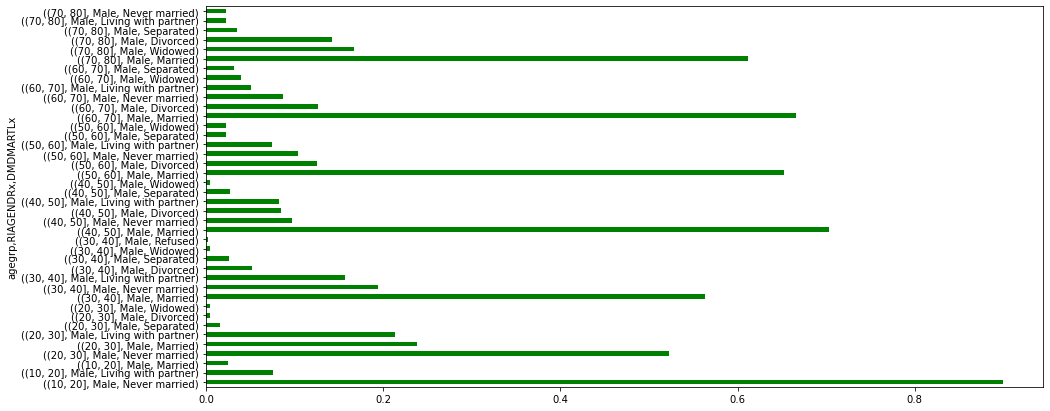

In [12]:
# df["agegrp"] = pd.cut(df["RIDAGEYR"], pd.interval_range(start=10, end=100, freq=10))

women = da[(da["RIAGENDRx"] == 'Male')] #Sorting for Women only

z = women.groupby(["agegrp","RIAGENDRx"])["DMDMARTLx"].value_counts(normalize=True,ascending=False)
plt.figure(figsize=(15, 7))  # Make the figure wider than default (12cm wide by 5cm tall)
z.plot.barh(rot=0, color="green")

In [13]:
da.groupby(["agegrp","RIAGENDRx"])["DMDMARTLx"].value_counts(normalize=True,ascending=False)


agegrp    RIAGENDRx  DMDMARTLx          
(10, 20]  Female     Never married          0.769231
                     Living with partner    0.205128
                     Married                0.025641
          Male       Never married          0.900000
                     Living with partner    0.075000
                                              ...   
(70, 80]  Male       Widowed                0.166667
                     Divorced               0.141791
                     Separated              0.034826
                     Living with partner    0.022388
                     Never married          0.022388
Name: DMDMARTLx, Length: 79, dtype: float64

<AxesSubplot:xlabel='DMDMARTLx', ylabel='RIDAGEYR'>

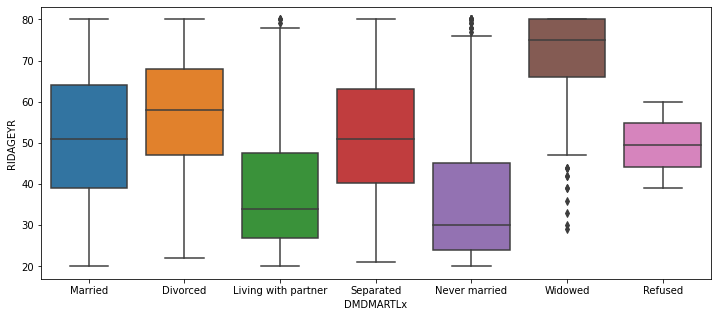

In [14]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="DMDMARTLx", y="RIDAGEYR", data=da)  

## Question 3
Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.


(array([   2.,   43.,  354., 1052., 1407., 1390.,  990.,  368.,   62.,
           5.]),
 array([129.7, 137. , 144.3, 151.6, 158.9, 166.2, 173.5, 180.8, 188.1,
        195.4, 202.7]),
 <BarContainer object of 10 artists>)

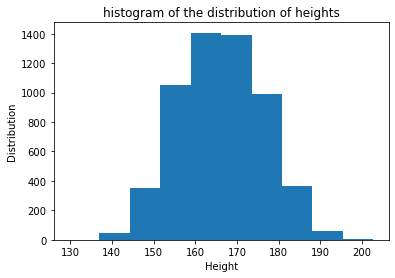

In [16]:
plt.xlabel('Height')
plt.ylabel('Distribution')
plt.title('histogram of the distribution of heights')
plt.hist(da['BMXHT'])


In [17]:
da['BMXHT'].describe()

count    5673.000000
mean      166.142834
std        10.079264
min       129.700000
25%       158.700000
50%       166.000000
75%       173.500000
max       202.700000
Name: BMXHT, dtype: float64

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMXHT', ylabel='Density'>

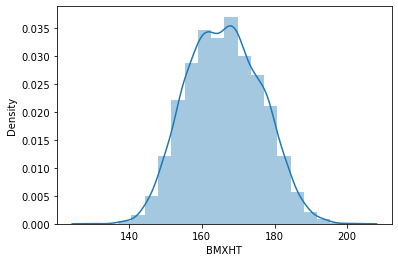

In [154]:
sns.distplot(da['BMXHT'],  bins=20)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMXHT', ylabel='Density'>

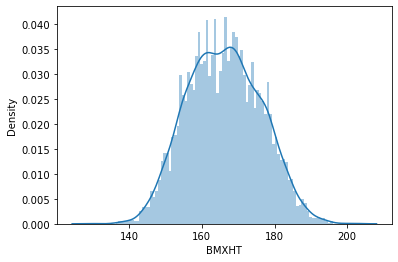

In [155]:
sns.distplot(da['BMXHT'],  bins=100)

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

<AxesSubplot:xlabel='RIAGENDRx', ylabel='BMXHT'>

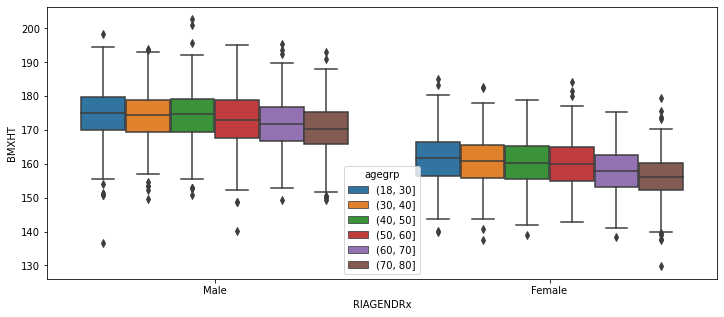

In [323]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="RIAGENDRx", y="BMXHT", hue="agegrp", data=da)

<AxesSubplot:xlabel='RIAGENDRx', ylabel='BMXHT'>

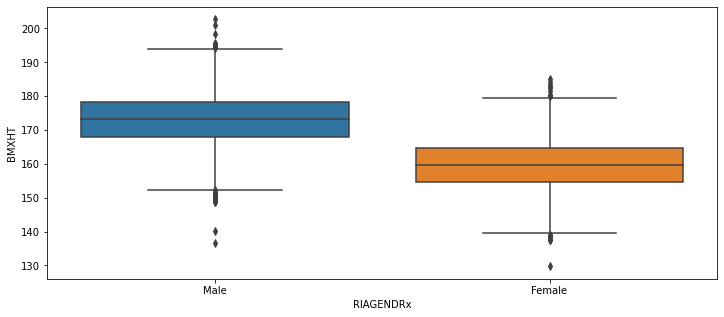

In [324]:
da["agegrp30-40"] = pd.cut(da.RIDAGEYR, [ 30, 40])
plt.figure(figsize=(12, 5))
sns.boxplot(x="RIAGENDRx", y="BMXHT", hue="agegrp30-40", data=da)

## Question 4
Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents (BPXSY1 and BPXSY2).

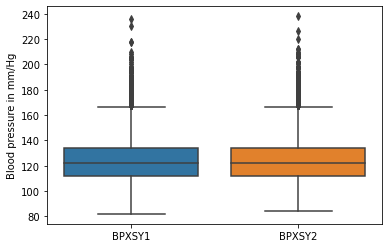

In [157]:
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

<AxesSubplot:xlabel='RIAGENDRx', ylabel='BPXSY1'>

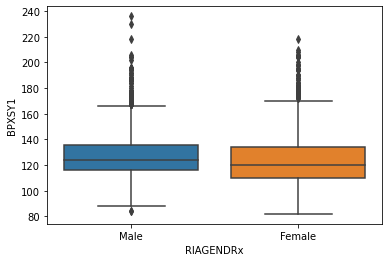

In [283]:
sns.boxplot(x="RIAGENDRx", y="BPXSY1", data=da)

<AxesSubplot:xlabel='RIAGENDRx', ylabel='BPXSY2'>

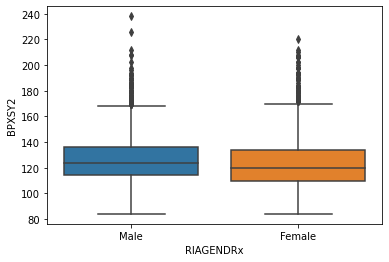

In [284]:
sns.boxplot(x="RIAGENDRx", y="BPXSY2", data=da)

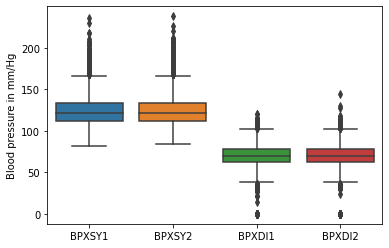

In [23]:
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [158]:
da['gt'] = da["BPXSY1"] >  da["BPXSY2"]
da['gt'] .value_counts()

False    3272
True     2463
Name: gt, dtype: int64

 second blood pressure reading on a subject tended on average to be slightly lower than the first measurement

## Question 5
Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is DMDEDUC2). Convert the frequencies to proportions.

In [252]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})

## Frequencies Table

In [327]:
freq = da.DMDEDUC2x.value_counts()
freq

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

In [328]:
proportion = freq / freq.sum()

<AxesSubplot:>

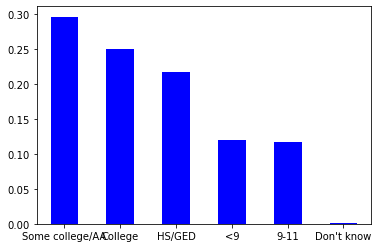

In [332]:
proportion.plot.bar(rot=0, color="blue")

In [279]:
dx = da.loc[~da.DMDEDUC2x.isin(["Don't know", "Missing"]), :]  # Eliminate rare/missing values
age = da['age'][3]
dx = dx.groupby(["age"])["DMDEDUC2x"]
dx = dx.value_counts()
dx = dx.unstack() # Restructure the results from 'long' to 'wide'
dx = dx.apply(lambda x: x.median(), axis=0) # Normalize within each stratum to get proportions


In [280]:
dx

DMDEDUC2x
9-11               111.0
<9                  93.0
College            264.0
HS/GED             182.0
Some college/AA    282.0
dtype: float64

In [234]:
dx

DMDEDUC2x,9-11,<9,College,HS/GED,Some college/AA
age,,,,,
"(30, 40]",0.119099,0.099785,0.283262,0.195279,0.302575


<AxesSubplot:xlabel='DMDEDUC2x'>

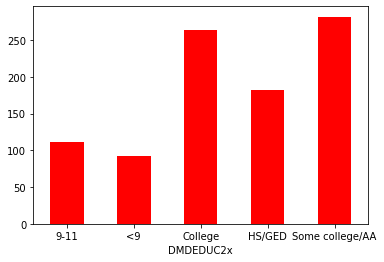

In [331]:
dx.plot.bar(rot=0, color="red")

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [22]:
female_age_mvu = da[da['RIAGENDRx'] == 'Female'].groupby(["SDMVSTRA","SDMVPSU"])['RIDAGEYR'].mean()

female_BMI_mvu = da[da['RIAGENDRx'] == 'Female'].groupby(["SDMVSTRA","SDMVPSU"])['BMXBMI'].mean()

female_height_mvu =da[da['RIAGENDRx'] == 'Female'].groupby(["SDMVSTRA","SDMVPSU"])['BMXHT'].mean()

## For male

male_age_mvu = da[da['RIAGENDRx'] == 'Male'].groupby(["SDMVSTRA","SDMVPSU"])['RIDAGEYR'].mean()

male_bmi_mvu = da[da['RIAGENDRx'] == 'Male'].groupby(["SDMVSTRA","SDMVPSU"])['BMXBMI'].mean()

male_height_mvu = aa = da[da['RIAGENDRx'] == 'Male'].groupby(["SDMVSTRA","SDMVPSU"])['BMXHT'].mean()

aa.max()/aa.min()



# Q6b. Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU. Report the ratio between the largest and smalles IQR across the MVUs.


age_iqr = np.percentile(male_age_mvu, [75]) - np.percentile(male_age_mvu, [25])
bmi_iqr = np.percentile(male_bmi_mvu, [75]) - np.percentile(male_bmi_mvu, [25])
height_iqr = np.percentile(male_height_mvu, [75]) - np.percentile(male_height_mvu, [25])

print('IQR ratio for age Bmi and Height')

print(age_iqr)
print(bmi_iqr)
print(height_iqr)

female_height = da[da['RIAGENDRx'] == 'Female'].groupby(["SDMVSTRA","SDMVPSU"])['BMXHT'].mean()



# print('IQR for age Bmi and Height of male')
age_iqr = da[da['RIAGENDRx'] == 'Male'].groupby(["SDMVSTRA","SDMVPSU"])['RIDAGEYR'].quantile(.25) - da[da['RIAGENDRx'] == 'Male'].groupby(["SDMVSTRA","SDMVPSU"])['RIDAGEYR'].quantile(.75)

bmi_iqr = da[da['RIAGENDRx'] == 'Male'].groupby(["SDMVSTRA","SDMVPSU"])['BMXBMI'].quantile(.75) - da[da['RIAGENDRx'] == 'Male'].groupby(["SDMVSTRA","SDMVPSU"])['BMXBMI'].quantile(.25)

height_iqr  = da[da['RIAGENDRx'] == 'Male'].groupby(["SDMVSTRA","SDMVPSU"])['BMXHT'].quantile(.75) - da[da['RIAGENDRx'] == 'Male'].groupby(["SDMVSTRA","SDMVPSU"])['BMXHT'].quantile(.25)

### Male iqr ratio
print('****************Male IQR ratio****************')
print(age_iqr.max()/age_iqr.min())
print(bmi_iqr.max()/bmi_iqr.min() )
print(height_iqr.max()/height_iqr.min())


### Female iqr ratio
# print('IQR for age Bmi and Height of female')
female_age_iqr = da[da['RIAGENDRx'] == 'Female'].groupby(["SDMVSTRA","SDMVPSU"])['RIDAGEYR'].quantile(.75) - da[da['RIAGENDRx'] == 'Female'].groupby(["SDMVSTRA","SDMVPSU"])['RIDAGEYR'].quantile(.25)

female_BMI_iqr = da[da['RIAGENDRx'] == 'Female'].groupby(["SDMVSTRA","SDMVPSU"])['BMXBMI'].quantile(.75) -da[da['RIAGENDRx'] == 'Female'].groupby(["SDMVSTRA","SDMVPSU"])['BMXBMI'].quantile(.25)

female_height_iqr =da[da['RIAGENDRx'] == 'Female'].groupby(["SDMVSTRA","SDMVPSU"])['BMXHT'].quantile(.75) - da[da['RIAGENDRx'] == 'Female'].groupby(["SDMVSTRA","SDMVPSU"])['BMXHT'].quantile(.25)
print('****************Female IQR ratios****************')
print('Age' , female_age_iqr.max()/female_age_iqr.min())
print('BMI' ,female_BMI_iqr.max()/female_BMI_iqr.min() )
print('Height' , female_height_iqr.max()/female_height_iqr.min())




IQR ratio for age Bmi and Height
[5.33807727]
[1.65444179]
[2.33002674]
****************Male IQR ratio****************
0.5460526315789473
2.341463414634145
1.5870967741935498
****************Female IQR ratios****************
Age 1.625
BMI 1.5161290322580645
Height 1.5874587458745906
